Paso 0. Importar librerías

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Paso 1. Cargar los  datos

In [213]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
data.drop(["PassengerId","Name", "Ticket","Fare"], axis =1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


Paso 2. Análisis exploratorio de datos.

In [215]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [217]:
data.drop(["Cabin"], axis = 1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


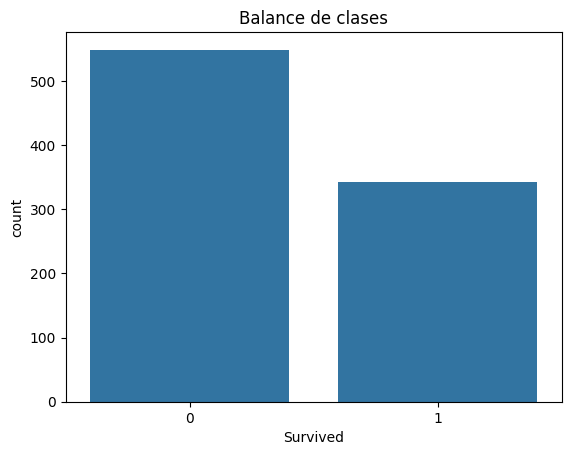

In [218]:
plt.title("Balance de clases")
sns.countplot(x='Survived', data=data);

In [219]:
data.Survived.value_counts()

,count
Survived,
0,549
1,342


/tmp/ipython-input-289997055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=data, palette = 'rainbow');


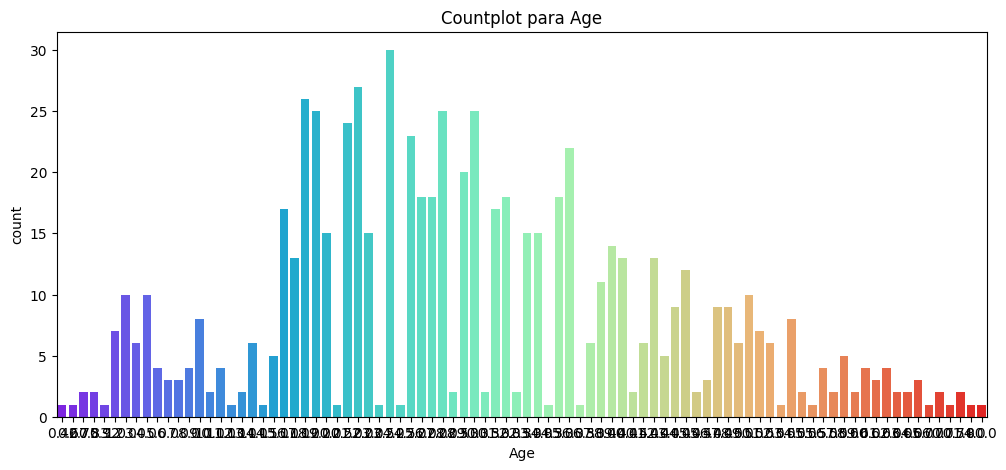

In [220]:
plt.figure(figsize= (12,5))
plt.title("Countplot para Age")
sns.countplot(x='Age', data=data, palette = 'rainbow');

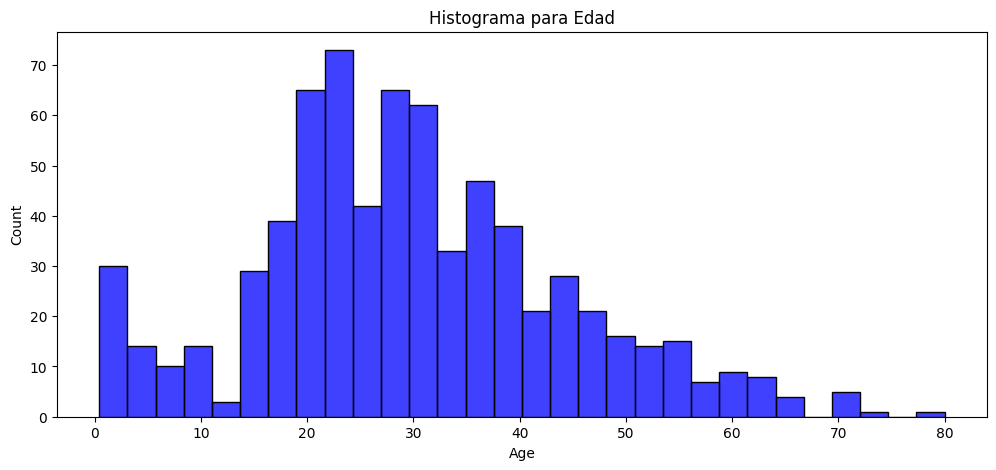

In [221]:
plt.figure(figsize = (12,5))
plt.title("Histograma para Edad")
sns.histplot(data=data, x="Age", bins= 30, color= "blue");

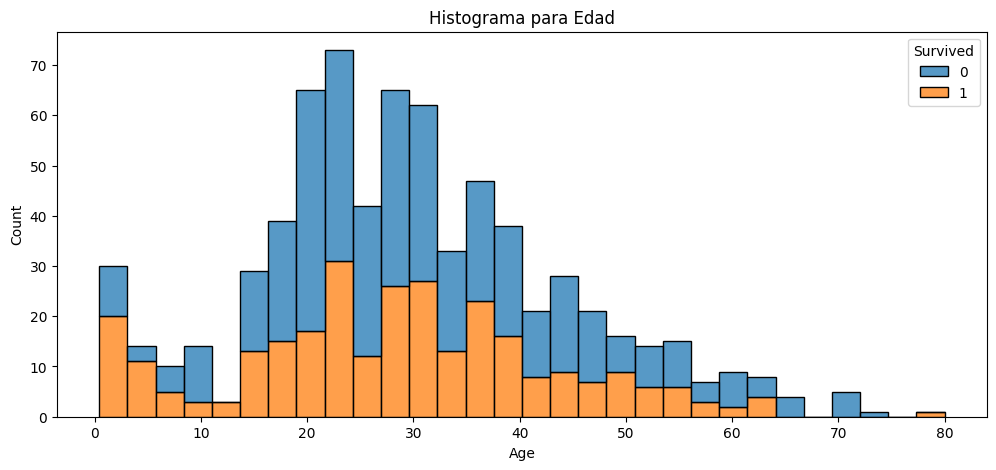

In [222]:
plt.figure(figsize = (12,5))
plt.title("Histograma para Edad")
sns.histplot(data=data, x="Age", bins= 30, hue="Survived", multiple="stack");

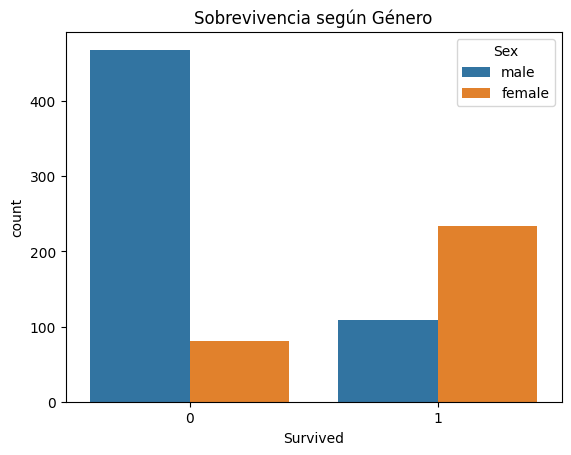

In [223]:
plt.title("Sobrevivencia según Género")
sns.countplot(x = "Survived",data= data,hue ="Sex");

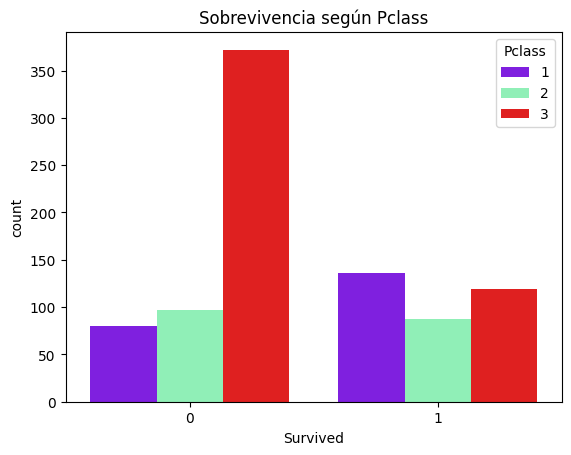

In [224]:
plt.title("Sobrevivencia según Pclass")
sns.countplot(x = 'Survived', hue = 'Pclass', data= data, palette = 'rainbow');

In [225]:
data.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


([<matplotlib.patches.Wedge at 0x7a05065de870>,
 [Text(-0.563380051149601, -0.944776649778493, 'Pclass3'),
  Text(1.0197568128898191, 0.41242701483389577, 'Pclass1'),
  Text(-0.24423344987358545, 1.07254371564186, 'Pclass2')],
 [Text(-0.3072982097179642, -0.5153327180609961, '55.1%'),
  Text(0.5562309888489922, 0.22496018990939767, '24.2%'),
  Text(-0.13321824538559204, 0.5850238448955599, '20.7%')])

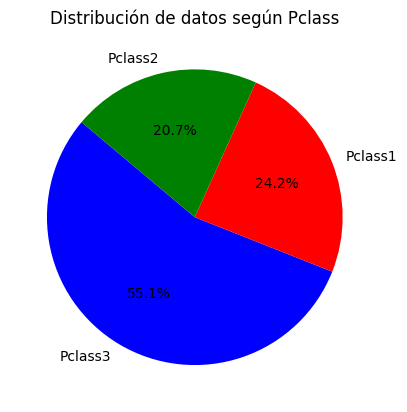

In [226]:
plt.title("Distribución de datos según Pclass")
plt.pie(data.Pclass.value_counts(),labels=["Pclass3","Pclass1","Pclass2"], colors=["blue", "red", "green"],autopct='%1.1f%%', startangle=140)

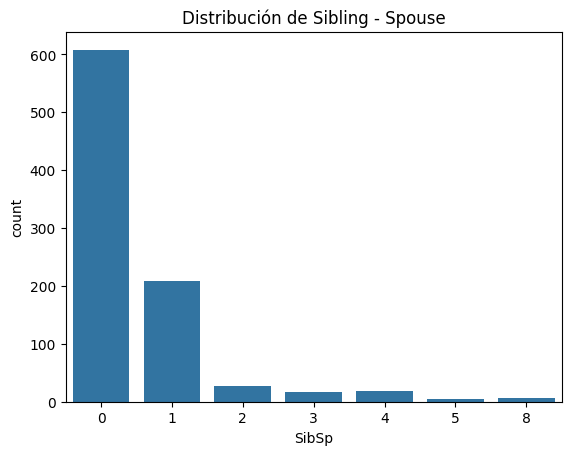

In [227]:
plt.title("Distribución de Sibling - Spouse")
sns.countplot(x='SibSp', data = data);

In [228]:
#plt.figure(figsize= (8,6))
#plt.title("Matriz de correlación")
#sns.heatmap(data.corr(), annot=True);

Paso 3. Preprocesamiento de datos.

In [229]:
data[data.Age < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
78,1,2,male,0.83,0,2,S
305,1,1,male,0.92,1,2,S
469,1,3,female,0.75,2,1,C
644,1,3,female,0.75,2,1,C
755,1,2,male,0.67,1,1,S
803,1,3,male,0.42,0,1,C
831,1,2,male,0.83,1,1,S


In [230]:
data.drop([78, 305,469,644, 755,803,831], inplace = True)

In [231]:
data.Age.mean()
data["Age"].fillna(data.Age.mean(), inplace = True)

/tmp/ipython-input-707612946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data.Age.mean(), inplace = True)


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    float64
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Embarked  882 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.2+ KB


Paso 3.2. Convertir variables categoricas a numéricas

In [233]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)
pclass = pd.get_dummies(data['Pclass'], drop_first=True)
sibsp = pd.get_dummies(data['SibSp'], drop_first=True, prefix = "Sibsp_")
parch = pd.get_dummies(data['Parch'], drop_first=True, prefix = "Parch_")

In [234]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [235]:
data.drop(['Sex', 'Embarked','Pclass','SibSp','Parch'], axis =1,inplace =True)

In [236]:
data=pd.concat([data, sex, embark, pclass,sibsp, parch], axis=1)
data.head()

,Survived,Age,male,Q,S,2,3,Sibsp__1,Sibsp__2,Sibsp__3,Sibsp__4,Sibsp__5,Sibsp__8,Parch__1,Parch__2,Parch__3,Parch__4,Parch__5,Parch__6
0,0,22.0,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,1,38.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1,26.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,1,35.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,0,35.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 890
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Age       884 non-null    float64
 2   male      884 non-null    bool   
 3   Q         884 non-null    bool   
 4   S         884 non-null    bool   
 5   2         884 non-null    bool   
 6   3         884 non-null    bool   
 7   Sibsp__1  884 non-null    bool   
 8   Sibsp__2  884 non-null    bool   
 9   Sibsp__3  884 non-null    bool   
 10  Sibsp__4  884 non-null    bool   
 11  Sibsp__5  884 non-null    bool   
 12  Sibsp__8  884 non-null    bool   
 13  Parch__1  884 non-null    bool   
 14  Parch__2  884 non-null    bool   
 15  Parch__3  884 non-null    bool   
 16  Parch__4  884 non-null    bool   
 17  Parch__5  884 non-null    bool   
 18  Parch__6  884 non-null    bool   
dtypes: bool(17), float64(1), int64(1)
memory usage: 35.4 KB


Paso 4. Construir el modelo

Paso 4.1 Generamos sets de entrenamiento y test.

In [238]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [239]:
X_train,X_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [240]:
x.shape

(884, 18)

In [241]:
X_train.shape

(707, 18)

In [242]:
X_test.shape

(177, 18)

Paso 4.2. Reescalamos variables

In [243]:
X_train

,Age,male,Q,S,2,3,Sibsp__1,Sibsp__2,Sibsp__3,Sibsp__4,Sibsp__5,Sibsp__8,Parch__1,Parch__2,Parch__3,Parch__4,Parch__5,Parch__6
219,30.000000,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
624,21.000000,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
782,29.000000,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292,36.000000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
757,18.000000,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,29.985856,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
845,42.000000,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
339,45.000000,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
526,50.000000,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [244]:
# Asegura que TODOS los nombres de columnas sean strings
X_train = X_train.copy()
X_test  = X_test.copy()
X_train.columns = X_train.columns.astype(str)
X_test.columns  = X_test.columns.astype(str)

scaler_x = MinMaxScaler()
scaler_x.fit(X_train)               # ajusta solo con train
X_train_scaled = scaler_x.transform(X_train)
X_test_scaled  = scaler_x.transform(X_test)
X_train.head()


,Age,male,Q,S,2,3,Sibsp__1,Sibsp__2,Sibsp__3,Sibsp__4,Sibsp__5,Sibsp__8,Parch__1,Parch__2,Parch__3,Parch__4,Parch__5,Parch__6
219,30.0,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
624,21.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
782,29.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292,36.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
757,18.0,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [245]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,Age,male,Q,S,2,3,Sibsp__1,Sibsp__2,Sibsp__3,Sibsp__4,Sibsp__5,Sibsp__8,Parch__1,Parch__2,Parch__3,Parch__4,Parch__5,Parch__6
0,0.367089,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.253165,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.354430,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.443038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.215190,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.366910,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,0.518987,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,0.556962,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,0.620253,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Paso 4.3.Entrenamos el  modelo.

In [246]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)

LogisticRegression()

In [247]:
LogisticRegression()

LogisticRegression()

In [248]:
predicciones= logmodel.predict(X_test_scaled)

In [249]:
predicciones

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0])

In [250]:
probabilidades =logmodel.predict_proba(X_test_scaled)
print("Mostrando las probabilidades para los primeros 5 ejemplos del set de Testing")
probabilidades[0:5]

Mostrando las probabilidades para los primeros 5 ejemplos del set de Testing


array([[0.90559397, 0.09440603],
       [0.90561871, 0.09438129],
       [0.39546027, 0.60453973],
       [0.89675782, 0.10324218],
       [0.90905839, 0.09094161]])

In [251]:
probabilidades.shape

(177, 2)

Paso 5. Evaluación

In [252]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.81      0.70      0.75        73

    accuracy                           0.81       177
   macro avg       0.81      0.79      0.80       177
weighted avg       0.81      0.81      0.81       177



Paso 5.1 Implementando las métricas

<Axes: >

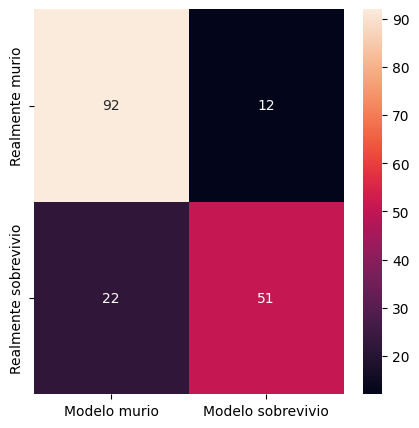

In [253]:
cm =confusion_matrix(y_test, predicciones)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, yticklabels=["Realmente murio", "Realmente sobrevivio"], xticklabels=["Modelo murio", "Modelo sobrevivio"])